In [1]:
import numpy as np
import pandas as pd
from random import choice
from matplotlib import pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

# K-means ++

1. Take one center c1, chosen uniformly at random X
2. Take an new center ci, choosing x e X with probability Dx^2/(summe Dx^2)
3. Repeat step 2 until we have taken k centers altogether
4. Proceed as with the standard k-means algorthm



## Datensatz generieren

[[0.38711627 0.96818741]
 [0.74961577 0.50317632]
 [0.8660022  0.06384128]
 [0.12397788 0.32597472]
 [0.28680921 0.25462492]
 [0.1003767  0.12478805]
 [0.81743074 0.63829198]
 [0.74438378 0.86914143]
 [0.36261632 0.49008086]
 [0.11027164 0.07953127]]


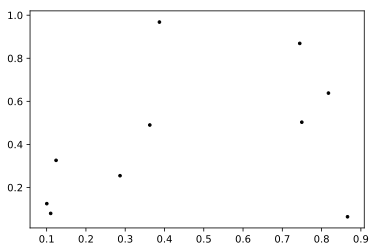

In [2]:
n_samples=10
data = np.random.random((n_samples, 2))

f1=data[0:((n_samples)), 0]
f2=data[0:((n_samples)),1]
plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

xAchsemax= f1.max()
xAchsemin = f1.min()
yAchsemax = f2.max()
yAchsemin = f2.min()

print(X)

## Step 1

Take one center c1, chosen uniformly at random from X

[[0.31467645 0.15172956]]


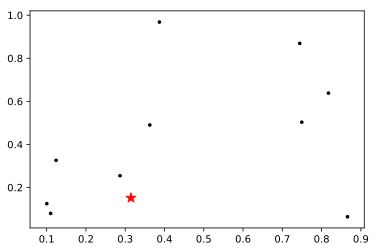

In [4]:
C = np.random.random((1,2))


cx1= C[0:((1)),0]
cy1 = C[0:((1)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

print(C)

## Step 2:

Take a new center ci choosing xEX with probability (D(x)^2)/(Summe D(x)^2)

D(x) denote the shortest distance from a data point to the closest center we have already chosen

Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2


In [5]:
data_2 = pd.DataFrame(X)
data_long = data_2.reset_index().melt(id_vars="index") #Index zur Tabelle hinzufügen
a = np.array(data_long)
index =a[0:n_samples,0] #Index definieren
Liste =[] #Liste für kleinsten Distanzen




In [7]:
#Anzahl der Cluster festlegen
k=3
n=0

while n<=k:
    n=n+1
    Liste =[]
    for i in range (len(X)):
        diff=X[i]-C
        dist = np.linalg.norm(diff,axis=1) # Distance berechnen
        min_dist= np.min(dist)
        Liste.append(min_dist)
    s= np.array(Liste)
    dist_2 = (s)**2
    prob = (dist_2)/ sum (dist_2) #p-Verteilung
    z=np.random.choice(index, p=prob) #Index des neuen Clusters in Tabelle
    c_neu=data[z] #Datenpunkt mit Index z als neues Center festlegen
    cl = np.ndarray.tolist(C) #alter arry in liste umwandeln damit ein Wert hinzugefügt werden kann
    c_neul = np.ndarray.tolist (c_neu) #neuer Wert in Liste umgewandelt
    cl.append (c_neul) # Center-Liste mit neuen Centerdaten erweitern
    C = np.array(cl) #Liste wieder in Array umwandeln
    
    
    
    



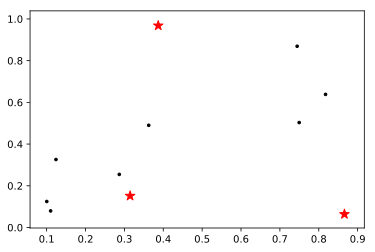

In [8]:
cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)

plt.scatter(cx1,cy1,marker='*',c='red',s=100)